In [108]:
%%time
import os

import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import matplotlib.colors

CPU times: user 14 µs, sys: 1 µs, total: 15 µs
Wall time: 17.2 µs


In [109]:
%%time
year = 2022
path = os.path.join('data', f'news_headlines_en_{year}.csv')
df = pd.read_csv(path, sep='\t')
df['date'] = pd.to_datetime(df['date'])
df.sample(10)

CPU times: user 10.1 ms, sys: 1.21 ms, total: 11.3 ms
Wall time: 9.76 ms


,date,headline,link
224,2022-01-21 14:20:24,Finnish and Russian presidents in call on Euro...,https://yle.fi/news/3-12280826
2525,2022-08-10 11:55:21,Poll: Nearly 1 in 4 say income not sufficient ...,https://yle.fi/news/3-12570353
1697,2022-05-12 15:57:51,British PM Boris Johnson in Finland: UK is Rea...,https://finlandtoday.fi/british-pm-boris-johns...
3338,2022-11-23 12:56:39,Christmas visits outweigh Covid risks for seni...,https://yle.fi/a/3-12680257
2978,2022-10-06 18:56:17,Finland sends ninth arms aid package to Ukraine.,https://yle.fi/news/3-12652086
2907,2022-09-28 14:59:18,Haavisto: Possibility that Nord Stream damage ...,https://yle.fi/news/3-12641895
1748,2022-05-17 13:24:13,Finland performs poorly in financial transpare...,https://yle.fi/news/3-12449051
826,2022-03-07 09:52:26,Finland probes providing hospital beds for Ukr...,https://yle.fi/news/3-12346451
3523,2022-12-22 10:28:23,Finnish Wildlife Agency grants temporary wolf ...,https://yle.fi/a/74-20009931
1307,2022-04-12 11:50:44,Finland should brace for influence campaigns b...,https://www.helsinkitimes.fi/finland/finland-n...


In [110]:
custom_stopwords = {
    "Finland",
    "Finnish",
    "Helsinki",
    "Link",
    "Article",
    "paper",
    "papers"
}

stopwords = set(STOPWORDS)
stopwords.update(custom_stopwords)

In [111]:
def generate_word_cloud(text: str, stopwords: set) -> None:
    plt.figure(figsize=(16, 9))
    cmap = matplotlib.colors.LinearSegmentedColormap.from_list(name="custom_cmap", colors=["#00a8e8", "#0077b6", "#118ab2"])
    wordcloud = WordCloud(
        width=3840,
        height=2160,
        stopwords=stopwords,
        colormap=cmap,
        max_words=1000,
        background_color="white",
        min_word_length=4,
        collocations=False
    ).generate(text)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")

CPU times: user 32.5 s, sys: 602 ms, total: 33.2 s
Wall time: 33.3 s


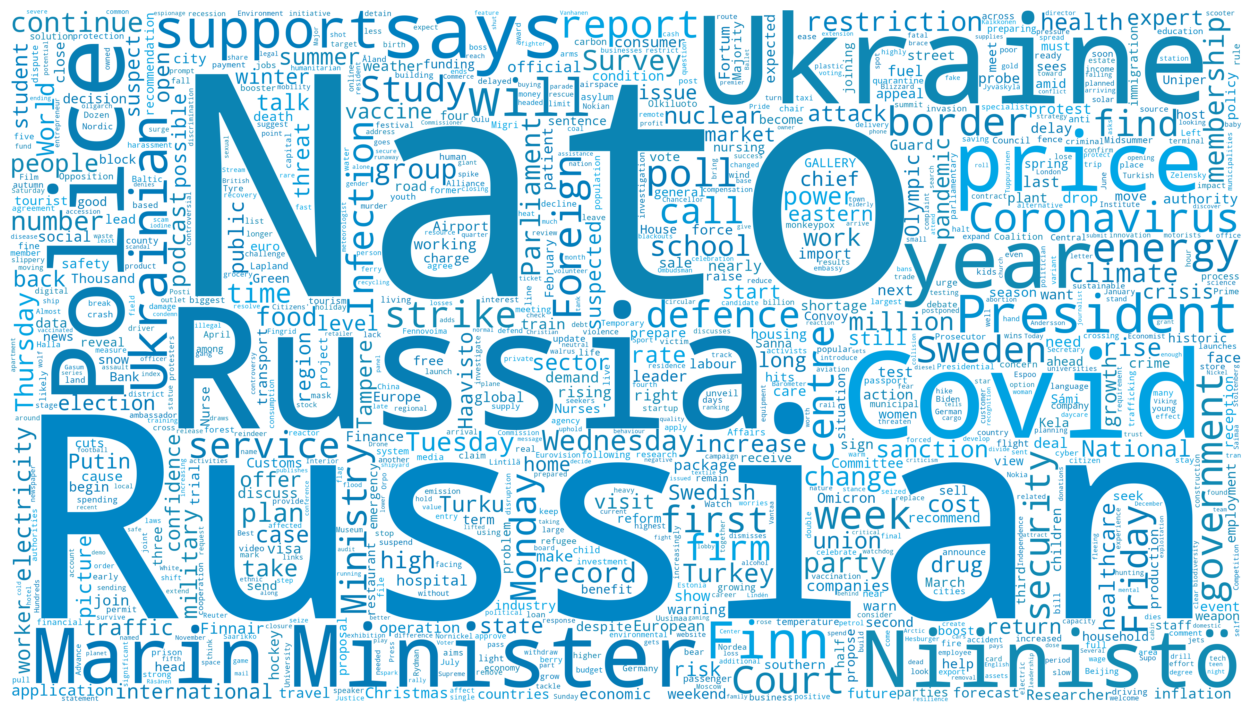

In [112]:
%%time
start_date = pd.to_datetime(f"01.01.{year} 00:00:00")
end_date = pd.to_datetime(f"31.12.{year} 00:00:00")

mask = (df['date'] > start_date) & (df['date'] <= end_date)
filtered_df = df.loc[mask]

text = filtered_df['headline'].sum()
generate_word_cloud(text, stopwords)